### Clean corpus posts of each company

In [1]:
# Import cleaning module

from tokenization_bias import main_token

In [27]:
# Call the main_token function to preprocess and clean the text in the specified JSON file.
# The first argument is the name of the JSON file, and the second argument is the name of the column
# in the file that contains the text to be cleaned.

asesoftware_posts=main_token("posts.json","descripcion")
globant_posts=main_token("globant_linkedin.json","content")
accenture_posts=main_token("accenture_linkedin.json","content")

# Print the cleaned text for each company
print(asesoftware_posts)
print(globant_posts)
print(accenture_posts)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wdmoreno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wdmoreno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wdmoreno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['lead trend 2022️artificial intelligence ️data analytics ️rpawhich one implement business', 'almost 2022 want share ai lead trend future year', 'demonstrate method aid mathematician discover new that_s simply amazing thing evolve field', 'limit rpa imagination programmer 🤖 ️can tell we rpa box application carlos castaño valencia diana cristhina pérez pérez fabian esteban peña castillo', 'introduce indoor garden control app ai enjoy fresh vegetable every day let grow 64 plant simultaneously green ai mashable', 'five way al contribute wildlifeconservation vast datum collection 📊 2 study protect specie 🐨 3 track wildlife pattern 📈 4 prediction endanger specie 🐼 5 classify animal specie', 'participant plan_semilla apprenticeship talk experience last month today want thank congratulate effort welcome team 👏 🏻 👏 🏻 👏 🏻thomas clarke rodríguez hernández sebastián_casas castillo leidy romero', 'today lcome new member team complete successfully plan_semilla 💫 plan_semilla apprenticeship start as

### NLP function

In [28]:
# Import model module

from model_bias import NLP_model

In [6]:

"""
Loads or trains a word2vec model based on a list of preprocessed text posts.

Args:
posts (list): List of preprocessed text posts.
model_name (str): Name to give to the trained word2vec model.

Returns:
model (gensim.models.Word2Vec): Trained word2vec model.
"""

ASW_model=NLP_model(asesoftware_posts,"biasASW_word2vec.model")
Globant_model=NLP_model(globant_posts,"biasGlobant_word2vec.model")
Accenture_model=NLP_model(accenture_posts,"biasAccenture_word2vec.model")

### Comparison of model and BIAS

In [7]:
# Import testing model

from test_bias import word_to_analyze_companies
from test_bias import distances_to_target_gender
from test_bias import distances_between_targets


In [8]:
word_list=['decision', 'special', 'enhance', 'speak', 'can', 'shape', 'idea', 'explain', 'author', 'invest', 'continue', 'wonder', '🎉', 'require', 'dream', 'analytic', 'reduce', 'core', '2022', 'evolution', 'include', 'old', 'evolve', 'highlight', 'favorite', 'combine', 'manage', 'difference', 'point', 'collection', 'online', 'congratulation', 'moment', 'international', 'key', 'never', 'smart', 'gender', 'face', 'equity', 'provide', 'medium', 'advantage', 'consider', 'thought', 'talent', 'really', 'society', 'foundation', 'view', 'without', 'us', 'vision', 'capability', 'ever', 'imagine', 'honor', 'excited', 'tell', 'happen']

for each in word_list:
    """
    Analyzes the given word and prints the companies that the word is associated with based on the provided models.

    Args:
        word (str): The word to be analyzed.
        asw_model (object): The ASW model object used for analysis.
        globant_model (object): The Globant model object used for analysis.
        accenture_model (object): The Accenture model object used for analysis.

    Returns:
        None
    """
    word_to_analyze_companies(each,ASW_model,Globant_model,Accenture_model)


----------------------------------------------------------------------------------------
Word:  decision
ASW:  [('industry', 0.6151000261306763), ('learn', 0.610041618347168), ('work', 0.6092746257781982), ('model', 0.6073532104492188), ('first', 0.5924954414367676)]
Globant:  [('dome', 0.22767843306064606), ('unique', 0.20591111481189728), ('🎥', 0.19338209927082062), ('🟢', 0.192180335521698), ('design', 0.18614152073860168)]
Accenture:  [('help', 0.2571909427642822), ('feel', 0.2507689595222473), ('one', 0.24949903786182404), ('service', 0.2363681048154831), ('people', 0.23225826025009155)]
----------------------------------------------------------------------------------------
Word:  special
ASW:  [('robot', 0.4920980930328369), ('start', 0.4874996244907379), ('thank', 0.4773994982242584), ('technology', 0.47712451219558716), ('one', 0.4768311381340027)]
Globant:  [('▸', 0.263932466506958), ('leader', 0.25465503334999084), ('world_cup', 0.23868268728256226), ('awareness', 0.230385676

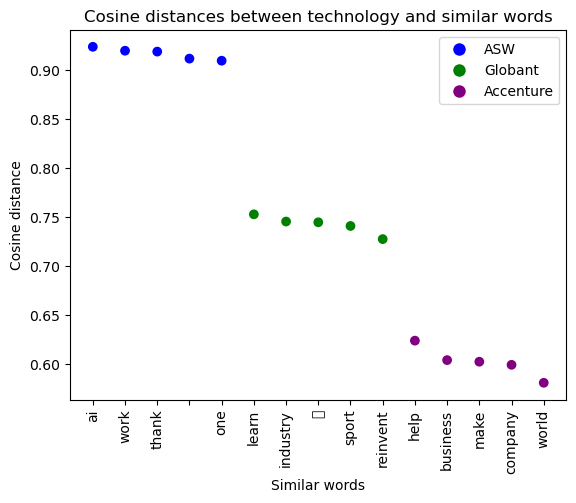

In [46]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Define the word to analyze
word="technology"

# Get the top 5 most similar words from each model
similarASW = ASW_model.wv.most_similar(word, topn=5)
similarGlobant = Globant_model.wv.most_similar(word, topn=5)
similarAccenture = Accenture_model.wv.most_similar(word, topn=5)

# Get the cosine distances of the similar words from each model
distances_coseno = [similarASW[0][1], similarASW[1][1], similarASW[2][1], similarASW[3][1], similarASW[4][1],
                     similarGlobant[0][1], similarGlobant[1][1], similarGlobant[2][1], similarGlobant[3][1], similarGlobant[4][1],
                     similarAccenture[0][1], similarAccenture[1][1], similarAccenture[2][1], similarAccenture[3][1], similarAccenture[4][1]]

# Create lists for the model names and similar words
nombres_modelos = ["ASW"]*5 + ["Globant"]*5 + ["Accenture"]*5
nombres_words_similar = [s[0] for s in similarASW] + [s[0] for s in similarGlobant] + [s[0] for s in similarAccenture]

# Create a scatter plot with the cosine distances and model names
fig, ax = plt.subplots()
scatter = ax.scatter(nombres_words_similar, distances_coseno, c=["blue"]*5 + ["green"]*5 + ["purple"]*5)

# Add plot title and axis labels
plt.xticks(rotation=90)
plt.title(f"Cosine distances between {word} and similar words")
plt.xlabel("Similar words")
plt.ylabel("Cosine distance")

# Create a legend for the model names and colors
legend_dict = {"ASW": "blue", "Globant": "green", "Accenture": "purple"}
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=k, markerfacecolor=v, markersize=10) for k, v in legend_dict.items()]
ax.legend(handles=legend_elements, loc='best')

# Show the plot
plt.show()


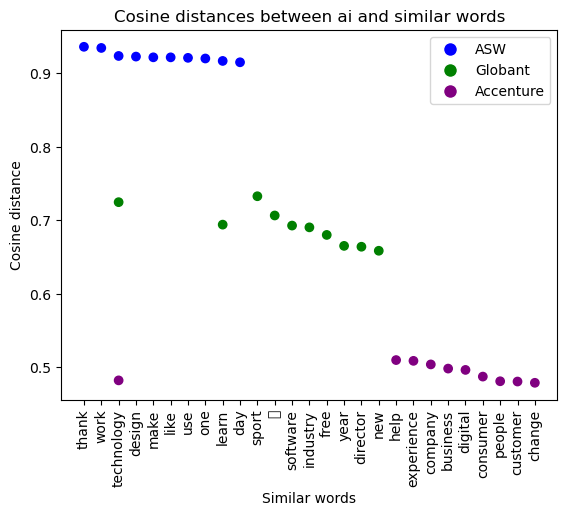

In [47]:
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Set parameters
word="ai"
top=10

# Get most similar words
similarASW = ASW_model.wv.most_similar(word, topn=top)
similarGlobant = Globant_model.wv.most_similar(word, topn=top)
similarAccenture = Accenture_model.wv.most_similar(word, topn=top)

# Combine cosine distances and word names
distancias_coseno = [sim[1] for sim in similarASW] + [sim[1] for sim in similarGlobant] + [sim[1] for sim in similarAccenture]
nombres_words_similar = [s[0] for s in similarASW] + [s[0] for s in similarGlobant] + [s[0] for s in similarAccenture]

# Create scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(nombres_words_similar, distancias_coseno, c=["blue"]*top + ["green"]*top + ["purple"]*top)

# Set plot properties
plt.xticks(rotation=90)
plt.title(f"Cosine distances between {word} and similar words")
plt.xlabel("Similar words")
plt.ylabel("Cosine distance")

# Add legend
legend_dict = {"ASW": "blue", "Globant": "green", "Accenture": "purple"}
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=k, markerfacecolor=v, markersize=10) for k, v in legend_dict.items()]
ax.legend(handles=legend_elements, loc='best')

# Show plot
plt.show()


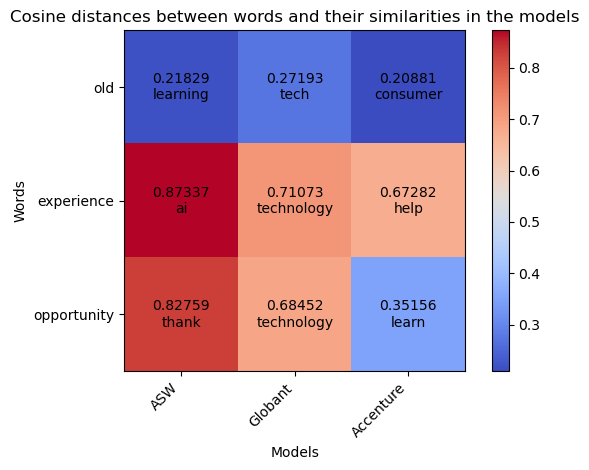

In [48]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Define list of words to analyze
words = ['old', "experience", 'opportunity']

# Calculate most similar words for each model and extract distances and similar words
ASW_similar = [ASW_model.wv.most_similar(p, topn=1) for p in words]
ASW_distances = np.array([[s[1] for s in sim] for sim in ASW_similar])
ASW_words = np.array([[s[0] for s in sim] for sim in ASW_similar])

Globant_similar = [Globant_model.wv.most_similar(p, topn=1) for p in words]
Globant_distances = np.array([[s[1] for s in sim] for sim in Globant_similar])
Globant_words = np.array([[s[0] for s in sim] for sim in Globant_similar])

Accenture_similar = [Accenture_model.wv.most_similar(p, topn=1) for p in words]
Accenture_distances = np.array([[s[1] for s in sim] for sim in Accenture_similar])
Accenture_words = np.array([[s[0] for s in sim] for sim in Accenture_similar])

# Concatenate distances and similar words from all models
distances_coseno = np.concatenate((ASW_distances, Globant_distances, Accenture_distances), axis=1)
words_similar = np.concatenate((ASW_words, Globant_words, Accenture_words), axis=1)

# Create a figure with an image showing the cosine distances between words and their similarities in the models
fig, ax = plt.subplots()
im = ax.imshow(distances_coseno, cmap="coolwarm")

# Set x and y ticks and labels
ax.set_xticks(np.arange(len(words)))
ax.set_yticks(np.arange(len(words)))
ax.set_xticklabels(["ASW"] + ["Globant"] + ["Accenture"])
ax.set_yticklabels(words)

# Rotate x tick labels and align them to the right
plt.xticks(rotation=45, ha="right")

# Add text labels with distances and similar words to the image
for i in range(len(words)):
    for j in range(len(words)):
        text = ax.text(j, i, "{:.5f}\n{}".format(distances_coseno[i, j], words_similar[i, j]),
                       ha="center", va="center", color="black")

# Add title, x and y labels, and a colorbar to the figure
plt.title("Cosine distances between words and their similarities in the models")
plt.xlabel("Models")
plt.ylabel("Words")
cbar = ax.figure.colorbar(im, ax=ax)

# Adjust layout and show the figure
plt.tight_layout()
plt.show()



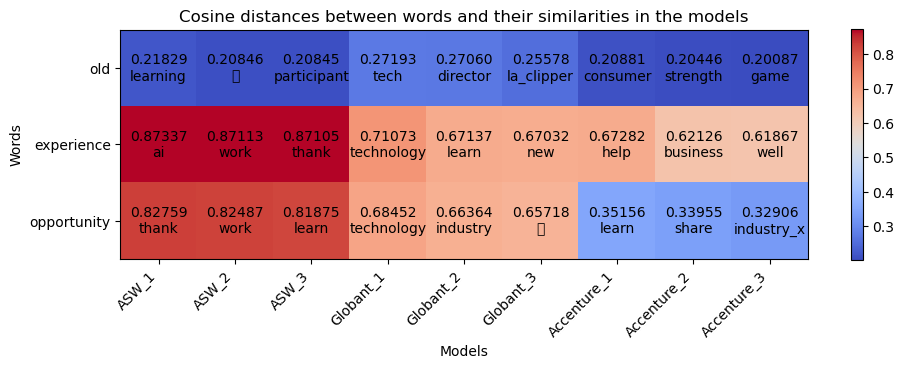

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Define a list of words
words = ['old', "experience", 'opportunity']

def obtener_similar(modelo, words, topn=3):

    """
    Returns the distances and similar words for a given list of words and a trained model.

    Parameters:
    modelo (Word2Vec): A trained Word2Vec model.
    words (list): A list of words to find similar words and distances.
    topn (int): The number of most similar words to find for each word in the list.

    Returns:
    tuple: A tuple containing two arrays: the distances and the similar words for each word in the list.
    """

    similar = [modelo.wv.most_similar(p, topn=topn) for p in words]
    distances = np.array([[s[1] for s in sim] for sim in similar])
    words_similar = np.array([[s[0] for s in sim] for sim in similar])
    return distances, words_similar

# Use the function to get the most similar words for the given words list for each of the three models
ASW_distances, ASW_words = obtener_similar(ASW_model, words)
Globant_distances, Globant_words = obtener_similar(Globant_model, words)
Accenture_distances, Accenture_words = obtener_similar(Accenture_model, words)

# Concatenate the distances and words arrays for all three models to create a matrix for plotting
distances_coseno = np.concatenate((ASW_distances, Globant_distances, Accenture_distances), axis=1)
words_similar = np.concatenate((ASW_words, Globant_words, Accenture_words), axis=1)

# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
im = ax.imshow(distances_coseno, cmap="coolwarm")

# Set the ticks and labels for the x-axis and y-axis
ax.set_xticks(np.arange(len(words) * 3))
ax.set_yticks(np.arange(len(words)))
ax.set_xticklabels(["ASW_1", "ASW_2", "ASW_3", "Globant_1", "Globant_2", "Globant_3", "Accenture_1", "Accenture_2", "Accenture_3"])
ax.set_yticklabels(words)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add the distances and words as text on each cell of the plot
for i in range(len(words)):
    for j in range(len(words) * 3):
        text = ax.text(j, i, "{:.5f}\n{}".format(distances_coseno[i, j], words_similar[i, j]),
                       ha="center", va="center", color="black")

# Set the title and axis labels for the plot
plt.title("Cosine distances between words and their similarities in the models")
plt.xlabel("Models")
plt.ylabel("Words")
cbar = fig.colorbar(im, shrink=0.3)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


In [105]:
# List of word vectors cosine similaritie
word_to_analyze_companies("offer",ASW_model,Globant_model,Accenture_model)

----------------------------------------------------------------------------------------
Word:  offer
ASW:  [('solution', 0.3647210896015167), ('artificial_intelligence', 0.3637802302837372), ('teach', 0.35700204968452454), ('make', 0.3511893153190613), ('quantum_computing', 0.34899675846099854)]
Globant:  [('learn', 0.38978826999664307), ('sport', 0.37214189767837524), ('become', 0.3709523677825928), ('ai', 0.37029656767845154), ('industry', 0.36599308252334595)]
Accenture:  [('share', 0.30061182379722595), ('need', 0.29324913024902344), ('well', 0.28903377056121826), ('life', 0.27723538875579834), ('like', 0.2657863199710846)]


In [80]:
# Analyze specific words in the context of "man" and "woman" in the 3 companies

distances_to_target_gender("experience", ASW_model, Globant_model, Accenture_model)
distances_to_target_gender("old", ASW_model, Globant_model, Accenture_model)
distances_to_target_gender("intelligence", ASW_model, Globant_model, Accenture_model)
distances_to_target_gender("opportunity", ASW_model, Globant_model, Accenture_model)
distances_to_target_gender("social", ASW_model, Globant_model, Accenture_model)
distances_to_target_gender("listen", ASW_model, Globant_model, Accenture_model)
distances_to_target_gender("challenge", ASW_model, Globant_model, Accenture_model)



 Word: experience

Distances 'woman' with experience:
ASW: 0.2483, Globant: 0.4131, Accenture: 0.5971
Distances with 'man' with experience :
ASW: 0.9297, Globant: 0.9131, Accenture: 0.9573

 Word: old

Distances 'woman' with old:
ASW: 0.8889, Globant: 0.8010, Accenture: 0.8833
Distances with 'man' with old :
ASW: 1.0147, Globant: 0.8983, Accenture: 0.9562

 Word: intelligence

Distances 'woman' with intelligence:
ASW: 0.7230, Globant: 0.5397, Accenture: 0.7188
Distances with 'man' with intelligence :
ASW: 1.0312, Globant: 1.0218, Accenture: 0.9185

 Word: opportunity

Distances 'woman' with opportunity:
ASW: 0.2865, Globant: 0.4532, Accenture: 0.8189
Distances with 'man' with opportunity :
ASW: 0.9714, Globant: 0.9031, Accenture: 1.0551

 Word: social

Distances 'woman' with social:
ASW: 0.5178, Globant: 0.7649, Accenture: 0.6303
Distances with 'man' with social :
ASW: 1.0105, Globant: 0.8942, Accenture: 0.8986

 Word: listen

Distances 'woman' with listen:
ASW: 0.7980, Globant: 0.541

In [111]:
# Analyze and compare 2 targets in the 3 companies

distances_between_targets("opportunity", "experience", ASW_model, Globant_model, Accenture_model)
distances_between_targets("opportunity", "old", ASW_model, Globant_model, Accenture_model)
distances_between_targets("career", "grow", ASW_model, Globant_model, Accenture_model)
distances_between_targets("ai", "smart", ASW_model, Globant_model, Accenture_model)
distances_between_targets("team", "technology", ASW_model, Globant_model, Accenture_model)
distances_between_targets("equity", "career", ASW_model, Globant_model, Accenture_model)
distances_between_targets("equity", "gender", ASW_model, Globant_model, Accenture_model)
distances_between_targets("culture", "technology", ASW_model, Globant_model, Accenture_model)
distances_between_targets("health","ai", ASW_model, Globant_model, Accenture_model)
distances_between_targets("future","ai", ASW_model, Globant_model, Accenture_model)
distances_between_targets("metaverse","goal", ASW_model, Globant_model, Accenture_model)
distances_between_targets("congratulation","happy", ASW_model, Globant_model, Accenture_model)




 Distances opportunity with experience:

ASW: 0.2298, Globant: 0.4075, Accenture: 0.7022

 Distances opportunity with old:

ASW: 0.8916, Globant: 0.7957, Accenture: 1.0075

 Distances career with grow:

ASW: 0.9147, Globant: 0.8515, Accenture: 0.6876

 Distances ai with smart:

ASW: 0.8076, Globant: 0.7015, Accenture: 0.9131

 Distances team with technology:

ASW: 0.1148, Globant: 0.3945, Accenture: 0.5436

 Distances equity with career:

ASW: 0.9979, Globant: 0.9348, Accenture: 0.8930

 Distances equity with gender:

ASW: 0.8090, Globant: 1.0317, Accenture: 1.0167

 Distances culture with technology:

ASW: 0.5528, Globant: 0.6056, Accenture: 0.7403

 Distances health with ai:

ASW: 0.6036, Globant: 0.7408, Accenture: 0.7434

 Distances future with ai:

ASW: 0.2624, Globant: 0.4666, Accenture: 0.6213

 Distances metaverse with goal:

ASW: 0.7551, Globant: 0.8029, Accenture: 0.8983

 Distances congratulation with happy:

ASW: 0.8144, Globant: 0.8699, Accenture: 0.9907


### Insights:
1. Regarding gender, there is a bias in the world of technology in general, and it is related to always associating men with engineering or science. This has changed in recent years, and as we see in the cosine distances of the 3 companies, efforts are being made to stop biasing men, but in most words, men still win over women.

2. As we can see, asesoftware emphasizes a clearer growth path, as there is a stronger relationship between the words "career" and "grow," much higher than Accenture and Globant.

3. In all 3 companies, there is a strong correlation between "opportunity" and "age," so it is assumed that the older you are, the more opportunities you have, taking into account experience.

4. Accenture and globant talk more about health topics when they refers to IA. ASW talks less abput this topic.

5. All three companies have a positive mindset regarding team work and they try to congratulate people when they reach a goal.

5. Gender equity is strongly linked to all 3 companies.



In [52]:
# Most common words for each model

ASW_common = ASW_model.wv.index_to_key
Globant_common = Globant_model.wv.index_to_key
Accenture_common = Accenture_model.wv.index_to_key

# Common words in the 3 models
common_words = set(ASW_common) & set(Globant_common) & set(Accenture_common)

print("ASW common words:", ASW_common)
print("Globant common words:", Globant_common)
print("Accenture common words:", Accenture_common)
print("Common words across all 3 models:", common_words)


ASW common words: ['ai', 'work', 'thank', 'use', 'want', 'learn', 'design', 'technology', 'we', 'team', 'datum', 'year', 'start', 'new', 'make', 'business', 'human', 'create', '️', 'think', 'machine', 'help', 'day', 'quantum', 'one', 'robot', 'experience', 'love', 'write', 'model', 'solution', 'like', 'today', 'quantum_computing', 'know', 'good', 'could', 'understand', 'artificial_intelligence', 'article', 'rpa', 'data', 'lab', 'time', 'course', 'talk', 'need', 'company', 'apply', '🖤', 'user', 'people', 'process', 'first', 'asesoftware', 'information', 'way', 'read', 'improve', 'industry', 'want_know', '💪', 'job', 'video', 'two', 'enjoy', 'get', 'build', 'well', 'class', 'last', 'different', 'let', 'check', 'share', 'world', 'change', 'knowledge', 'iván_caballero', 'happy', 'come', 'application', 'designer', 'contact_we', 'holistic_design', 'challenge', '👏', 'together', 'science', 'fact', 'daily', 'take', 'automation', 'become', 'beten', 'feel', 'project', 'al', 'next', 'ai_designer', 

In [55]:
from collections import defaultdict

# Importing defaultdict from the collections module
ASW_common = ASW_model.wv.index_to_key
Globant_common = Globant_model.wv.index_to_key
Accenture_common = Accenture_model.wv.index_to_key

# Extracting the index of the keys in the three models
common_words = set(ASW_common) & set(Globant_common) & set(Accenture_common)

# Finding the set intersection of the index in the three models
freq_dict = defaultdict(int)

# Creating a defaultdict object with default value 0
for word in common_words:
    # Updating the count for the current word in the defaultdict object
    freq_dict[word] += 1

# Sorting the dictionary items in descending order based on count
sorted_words = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)

# Extracting the top common words
top_words = [w[0] for w in sorted_words]

# Printing the top common words
print("Top common words:", top_words)



Top common words: ['solution', 'offer', 'start', 'full', 'congratulation', 'health', 'year', 'lead', 'include', 'watch', 'intelligence', 'design', 'free', '🙌', 'use', 'every', 'industry', 'first', '🎉', 'result', 'show', 'also', 'ready', 'know', 'thank', 'today', 'favorite', 'art', 'analytic', 'listen', 'meet', 'ai', 'challenge', 'build', 'ever', 'amazing', 'future', 'community', 'explain', 'feel', 'hear', 'career', 'research', 'manage', 'world', 'face', 'new', 'online', 'innovation', 'grow', 'partner', 'discover', 'talk', 'decision', 'designer', 'tool', 'team', 'inspire', 'company', 'never', 'place', '️', 'we', 'tell', 'sport', 'let', 'technology', 'us', 'medium', 'approach', 'enhance', 'much', 'even', 'business', 'celebrate', '2022', 'unique', 'bring', 'stay', 'really', 'society', 'get', 'professional', 'customer', 'everyone', 's', 'help', 'explore', 'can', 'difference', 'insight', 'program', 'give', 'expert', 'role', 'shape', 'evolution', '👏', 'science', 'happen', 'provide', 'make', 

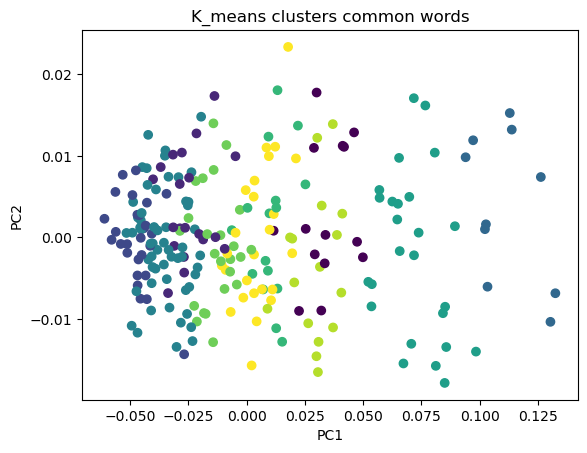

In [56]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Get top common words from the three models
common_word_vectors = []
for word in top_words:
    common_word_vectors.append(
        ASW_model.wv.get_vector(word) + 
        Globant_model.wv.get_vector(word) + 
        Accenture_model.wv.get_vector(word)
    )
    
# Reduce dimensionality of the common word vectors to two using PCA
pca = PCA(n_components=2)
common_word_vectors_pca = pca.fit_transform(common_word_vectors)

# Cluster the common word vectors using KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(common_word_vectors)

# Plot the clusters on a scatter plot
plt.scatter(common_word_vectors_pca[:, 0], common_word_vectors_pca[:, 1], c=kmeans.labels_)
plt.title("K_means clusters common words")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Count the number of words in each cluster
cluster_counts = defaultdict(int)
for i in range(len(top_words)):
    cluster_counts[kmeans.labels_[i]] += 1



In [58]:
# Initialize a dictionary with default values as an empty list
words_in_clusters = defaultdict(list)

# Iterate over the top_words list and its indices using enumerate   
for i, word in enumerate(top_words):
    # Add the word to its corresponding cluster in the words_in_clusters dictionary    
    words_in_clusters[kmeans.labels_[i]].append(word)

# Sort the words_in_clusters dictionary by the number of words in each cluster in descending order
most_common_clusters = sorted(words_in_clusters.items(), key=lambda x: len(x[1]), reverse=True)

 # Iterate over the most_common_clusters list, which contains tuples of cluster indices and their corresponding words
for cluster, words in most_common_clusters:
    # Print the cluster index and its corresponding words in a readable format
    print(f"Cluster {cluster}: {words}")  



Cluster 4: ['offer', 'health', 'include', '🙌', 'favorite', 'art', 'listen', 'meet', 'community', 'career', 'manage', 'grow', 'decision', 'never', 'tell', 'us', 'medium', 'enhance', '2022', 'unique', 'stay', 'really', 's', 'can', 'difference', 'give', 'role', 'evolution', 'foundation', 'consider', 'speaker', '2023', 'gender', 'key', 'core', 'advantage', 'play', 'without', 'say', 'what', 'moment', 'recognize', 'capability', 'boost', 'field', 'wonder', 'international', 'highlight', 'view', 'big', 'possible', 'tune', 'special', 'equity', 'evolve', 'smart', 'must', 'combine']
Cluster 2: ['congratulation', '🎉', 'analytic', 'explain', 'society', 'program', 'shape', 'happen', 'provide', 'reach', 'honor', 'excited', 'old', 'idea', 'invest', 'dream', 'continue', 'thought', 'require', 'imagine', 'vision', 'reduce', 'talent', 'point', 'author', 'speak', 'collection']
Cluster 5: ['start', 'design', 'use', 'build', 'world', 'new', 'team', 'company', '️', 'we', 'get', 'create', 'one', 'good', 'way', 

### Unique data ASW

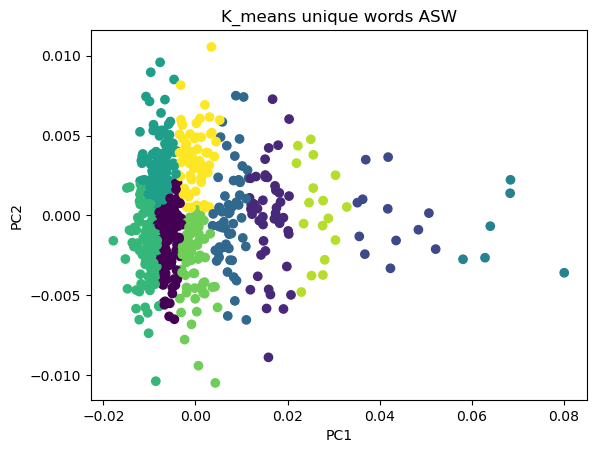

In [59]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Get index of common words for each model
ASW_common = ASW_model.wv.index_to_key
Globant_common = Globant_model.wv.index_to_key
Accenture_common = Accenture_model.wv.index_to_key

# Get unique words of ASW model by subtracting the common words from the set of all words
ASW_unique = set(ASW_common) - set(Globant_common) - set(Accenture_common)
# Get word vectors for unique words in the ASW model
ASW_vectors = [ASW_model.wv.get_vector(word) for word in ASW_unique]
unique_word_vectors = ASW_vectors

# Apply PCA to reduce dimensionality of word vectors
pca = PCA(n_components=2)
unique_word_vectors_pca = pca.fit_transform(unique_word_vectors)

# Apply KMeans clustering to unique word vectors
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(unique_word_vectors_pca)

# Plot the clusters in 2D space
plt.scatter(unique_word_vectors_pca[:, 0], unique_word_vectors_pca[:, 1], c=kmeans.labels_)
plt.title("K_means unique words ASW")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Create a dictionary to label each unique word with its corresponding model (in this case, ASW)
labels = defaultdict(str)
for i, word in enumerate(ASW_unique):
    labels[word] = "ASW"


In [61]:
# get the cluster labels assigned to each word in ASW_unique
word_labels = kmeans.labels_  

# initialize a defaultdict to store words in each cluster
cluster_words = defaultdict(list)  
for i, word in enumerate(ASW_unique):
    # append each word to its corresponding cluster based on the label
    cluster_words[word_labels[i]].append(word)  

for cluster_label, words in cluster_words.items():
    print("Cluster ", cluster_label)
    # print out the words in each cluster with its corresponding label
    print(words)  



Cluster  3
['context', 'python', 'lot', 'gpt', 'read_last', '👨', 'avoid', 'maría', '3', 'friendship', '🔬', 'chat', '⬇_️', 'engineering', 'interesting', 'dall', 'specific', 'night', 'photoshop', 'collect', 'comment', 'sebastián', '️do', '🧑', 'defeat', '️have', 'london_tech', 'battle', 'alejandro_salamanca', '2and', 'word', 'trust', 'nlp', '🙌_🏼', 'physicist', 'relevant', 'touch', 'diffusion', 'velásquez', 'able', 'sara', 'data_engineer', 'stable', 'colombia', '🏼', 'machine_🦾', 'sure', 'hand', 'form', 'robotic', 'emotion', 'communityequinox', 'seek', 'visual', 'start_career', '2', '🔥', 'feijóo']
Cluster  5
['increasingly', 'empathy', 'last_blog', 'he', 'computing', 'broad', 'technique', 'sale', 'equinox', 'appear', 'establishment', 'specify', 'contraception', '️more', 'send', 'later', 'entirely', 'valley', 'volunteer', 'umbrella', 'retailer', '🍫', 'yulisa', 'small', 'accurately', 'have', 'shy', 'war', 'grateful', '️in', 'humanlike', 'design_lab', 'chess', 'nicolás', '😂', 'egyptians', 'fem

### Unique data Globant

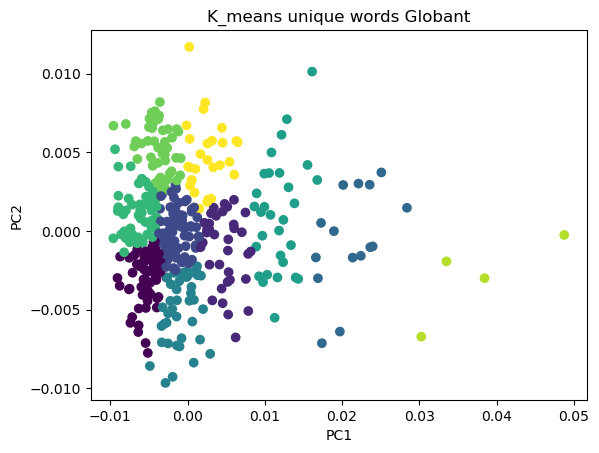

In [62]:
# import necessary libraries
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# get common words between models
ASW_common = ASW_model.wv.index_to_key
Globant_common = Globant_model.wv.index_to_key
Accenture_common = Accenture_model.wv.index_to_key

# get unique words for Globant
Globant_unique = set(Globant_common) - set(ASW_common) - set(Accenture_common)

# get word vectors for Globant
Globant_vectors = [Globant_model.wv.get_vector(word) for word in Globant_unique]
unique_word_vectors = Globant_vectors

# perform PCA
pca = PCA(n_components=2)
unique_word_vectors_pca = pca.fit_transform(unique_word_vectors)

# perform KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(unique_word_vectors_pca)

# plot the clusters
plt.scatter(unique_word_vectors_pca[:, 0], unique_word_vectors_pca[:, 1], c=kmeans.labels_)
plt.title("K_means unique words Globant")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# create a dictionary of labels for each word
labels = defaultdict(str)
for i, word in enumerate(Globant_unique):
    labels[word] = "Globant"


In [63]:
# get the cluster labels assigned to each word in ASW_unique
word_labels = kmeans.labels_  

# initialize a defaultdict to store words in each cluster
cluster_words = defaultdict(list)  
for i, word in enumerate(Globant_unique):
    # append each word to its corresponding cluster based on the label
    cluster_words[word_labels[i]].append(word)  

for cluster_label, words in cluster_words.items():
    print("Cluster ", cluster_label)
    # print out the words in each cluster with its corresponding label
    print(words)  


Cluster  5
['bozoma', 'edition', 'patricia', 'refik', 'mayo', 'arianna', 'cofounder', 'engage', 'interview', 'karlie_kloss', '🗓', 'que', 'huffington', 'bob_iger', 'la_clipper', '🇪', 'tristan_harris', 'diego_tartara', 'pomie', 'eliana', 'argentina', 'world_cup', 'fifa_world', 'cup', 'award', 'woman_build', 'roberto_carlos', '💚', 'glober', '➡']
Cluster  0
['laliga', '18', 'learner', 'meeting', 'nosso', 'marzo', 'syndrome', 'critical', 'coaching', 'unlimited', '🤔', 'actionable', 'consultancy', '🇹', 'atix', 'association', 'enter', 'trip', 'criar', 'mercedes', 'uncover', 'center', 'daytoday', 'organizational', 'announcement', '🌿', '🤛', 'impostor', 'paradigm', 'fácil', 'udemy', 'technologist', 'pujals', 'forrester', 'guess', 'newsletter', 'calendar', 'boundary', 'scaloneta', 'elena', 'phase', '⚡', 'unleash', 'testing', 'novembro', 'andrea', '🇽', 'qa', 'resume', 'region', 'macri', 'linguagem', 'demand', 'expertise', 'kill', 'several', 'disruptor', 'biomechanical', '🤜', 'hack', 'globant', 'fut

### Unique data Accenture

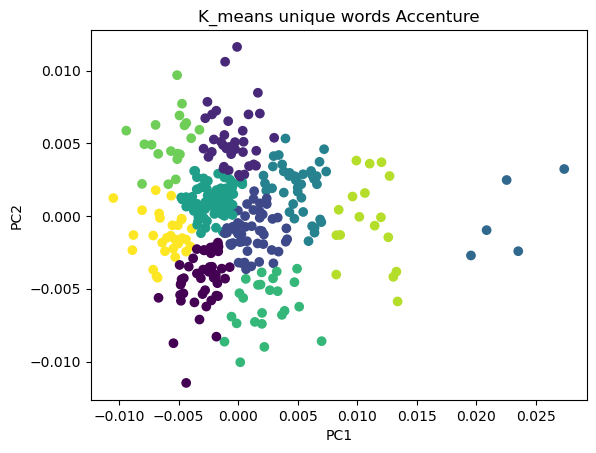

In [65]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Get unique words for each company
ASW_common = ASW_model.wv.index_to_key
Globant_common = Globant_model.wv.index_to_key
Accenture_common = Accenture_model.wv.index_to_key
Accenture_unique = set(Accenture_common) - set(ASW_common) - set(Globant_common)

# Get word vectors for unique words
Accenture_vectors = [Accenture_model.wv.get_vector(word) for word in Accenture_unique]
unique_word_vectors = Accenture_vectors

# Apply PCA to reduce dimensionality to 2
pca = PCA(n_components=2)
unique_word_vectors_pca = pca.fit_transform(unique_word_vectors)

# Apply KMeans clustering to group words into 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(unique_word_vectors_pca)

# Plot the clusters in a scatter plot
plt.scatter(unique_word_vectors_pca[:, 0], unique_word_vectors_pca[:, 1], c=kmeans.labels_)
plt.title("K_means unique words Accenture")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Create a dictionary of word labels for each cluster
labels = defaultdict(str)
for i, word in enumerate(Accenture_unique):
    labels[word] = "Accenture"


In [64]:
# get the cluster labels assigned to each word in ASW_unique
word_labels = kmeans.labels_  

# initialize a defaultdict to store words in each cluster
cluster_words = defaultdict(list)  
for i, word in enumerate(Accenture_unique):
    # append each word to its corresponding cluster based on the label
    cluster_words[word_labels[i]].append(word)  

for cluster_label, words in cluster_words.items():
    print("Cluster ", cluster_label)
    # print out the words in each cluster with its corresponding label
    print(words)  

Cluster  5
['embed', 'frontier', 'playbook', 'ireland', 'tour', 'maturity', 'resilient', 'disruption', 'obsolete', 'climate_change', 'reporting', 'purple', 'eu', 'wire', 'defense', 'redefine', 'congratulations', 'clear', 'protect', 'address', 'consecutive', 'shopping', 'impactful', 'relevance', 'sai', 'sign']
Cluster  0
['carefully', 'pride_mean', 'sleep', 'it', 'multidimensional', 'network', 'happiness', 'inside', 'massive', 'everyday', 'food', '15', 'risk', 'at', '1', 'automaker', 'profitability', 'azagury', 'truly', 'predictive', 'heart', 'serve', 'vital', 'towards', 'seamless', 'worker', 'foresight', 'jack', 'total', 'tag', 'bt', 'samta', 'hold', '✈', 'persecution', 'regardless', 'molly', 'cocacola', 'flight', '🌏', 'race', 'cool', 'upskilling', 'airline', '😎', 'everchange', '°', 'chart', '\U0001fae7', 'they', 'waste', 'planet', 'pursue', 'cluster', 'julie']
Cluster  2
['davos', 'importantly', 'fully', 'kapoor', 'growth', 'repetition', 'icymi', 'industry_x', '🎧', 'affordable', 'dhee

### Union of unique words of the three companies

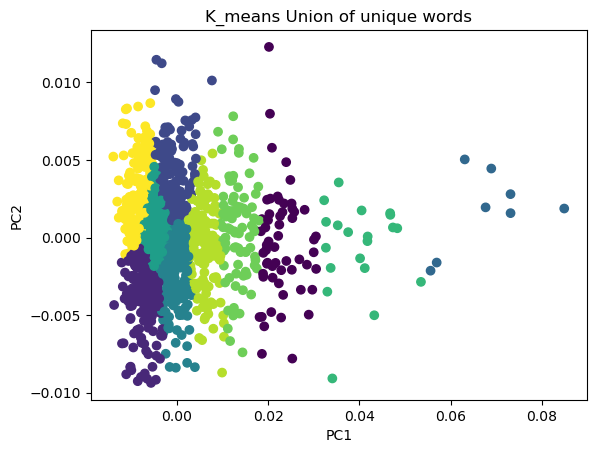

embed: Accenture
carefully: Accenture
increasingly: ASW
operational: ASW
empathy: ASW
user: ASW
merry: ASW
aidata: ASW
reflect: Accenture
season: ASW
swan: Globant
❤_️: ASW
covered1: ASW
🏃: ASW
oxford: ASW
fantastic: ASW
he: ASW
pride_mean: Accenture
intuit: Globant
sleep: Accenture
fully: Accenture
auto: Accenture
favourite: ASW
attract: Globant
someone: Globant
organisation: ASW
computing: ASW
golf: ASW
class: ASW
expectation: Accenture
repetition: Accenture
rodríguez: ASW
mens: Globant
kathy: Globant
broad: ASW
regional: Globant
technique: ASW
gpt: ASW
fundamental: ASW
industry_x: Accenture
👨: ASW
nosso: Globant
marzo: Globant
avoid: ASW
dutta: Globant
qc: ASW
selection: ASW
familiarize: ASW
100: Globant
globants: Globant
object: ASW
coaching: Globant
establishment: ASW
meaningful: Globant
blog: ASW
happiness: Accenture
stakeholder: Accenture
nano: ASW
specify: ASW
player: Globant
🤔: Globant
actionable: Globant
🏿: Globant
️more: ASW
salesforce: Globant
playbook: Accenture
trading: A

In [66]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from collections import defaultdict

# Get unique words for each company
ASW_unique = set(ASW_model.wv.index_to_key) - set(Globant_model.wv.index_to_key) - set(Accenture_model.wv.index_to_key)
Globant_unique = set(Globant_model.wv.index_to_key) - set(ASW_model.wv.index_to_key) - set(Accenture_model.wv.index_to_key)
Accenture_unique = set(Accenture_model.wv.index_to_key) - set(ASW_model.wv.index_to_key) - set(Globant_model.wv.index_to_key)

# Collect all unique word vectors
unique_word_vectors = []
for word in ASW_unique:
    unique_word_vectors.append(ASW_model.wv.get_vector(word))
for word in Globant_unique:
    unique_word_vectors.append(Globant_model.wv.get_vector(word))
for word in Accenture_unique:
    unique_word_vectors.append(Accenture_model.wv.get_vector(word))

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
unique_word_vectors_pca = pca.fit_transform(unique_word_vectors)

# Perform K-Means clustering with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(unique_word_vectors_pca)

# Plot the clusters
plt.scatter(unique_word_vectors_pca[:, 0], unique_word_vectors_pca[:, 1], c=kmeans.labels_)
plt.title("K_means Union of unique words")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Assign labels to each unique word based on the company it belongs to
labels = defaultdict(str)
for i, word in enumerate(ASW_unique):
    labels[word] = "ASW"
for i, word in enumerate(Globant_unique):
    labels[word] = "Globant"
for i, word in enumerate(Accenture_unique):
    labels[word] = "Accenture"

# Print each unique word with its company label
for i, word in enumerate(ASW_unique | Globant_unique | Accenture_unique):
    print(f"{word}: {labels[word]}")

# For each company, perform K-Means clustering on its unique words and print the most common clusters
for company, unique_words in [("ASW", ASW_unique), ("Globant", Globant_unique), ("Accenture", Accenture_unique)]:
    company_word_vectors = []
    for word in unique_words:
        company_word_vectors.append(ASW_model.wv.get_vector(word) if company == "ASW" else
                                     Globant_model.wv.get_vector(word) if company == "Globant" else
                                     Accenture_model.wv.get_vector(word))
    
    company_word_vectors_pca = pca.transform(company_word_vectors)
    kmeans_labels = kmeans.predict(company_word_vectors_pca)
    company_cluster_counts = defaultdict(int)
    for i in range(len(unique_words)):
        company_cluster_counts[kmeans_labels[i]] += 1
    company_words_in_clusters = defaultdict(list)
    for i, word in enumerate(unique_words):
        company_words_in_clusters[kmeans_labels[i]].append(word)
    company_most_common_clusters = sorted(company_words_in_clusters.items(), key=lambda x: len(x[1]), reverse=True)
    
    print(f"Most common clusters for {company}:")
    for cluster, words in company_most_common_clusters:
        print(f"Cluster {cluster}: {words}")
